[View in Colaboratory](https://colab.research.google.com/github/fayzii/ScrapIMDB/blob/master/ScrapIMDB.ipynb)

In [0]:
import requests as req
from bs4 import BeautifulSoup
from time import sleep
from time import time
from random import randint
from warnings import warn
from IPython.core.display import clear_output


headers = {"Accept-Language": "en-US, en;q=0.5"}
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

In [10]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = req.get('http://www.imdb.com/search/title?release_date=' + year_url + 
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')  
            break 

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year 
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.07652111928905478 requests/s


In [24]:
import pandas as pd
movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 5 columns):
imdb         2948 non-null float64
metascore    2948 non-null int64
movie        2948 non-null object
votes        2948 non-null int64
year         2948 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 115.2+ KB
None


,imdb,metascore,movie,votes,year
0,8.5,67,Gladiator,1144012,(2000)
1,8.5,80,Memento,982283,(2000)
2,8.3,55,Snatch,687725,(2000)
3,8.3,68,Requiem for a Dream,667228,(2000)
4,7.4,64,X-Men,512878,(2000)
5,7.8,73,Cast Away,450807,(2000)
6,7.6,64,American Psycho,409720,(2000)
7,7.3,62,Unbreakable,299052,(2000)
8,7.0,73,Meet the Parents,284501,(2000)
9,6.1,59,Mission: Impossible II,273261,(2000)


In [25]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1144012
1,Memento,(2000),8.5,80,982283
2,Snatch,(2000),8.3,55,687725
3,Requiem for a Dream,(2000),8.3,68,667228
4,X-Men,(2000),7.4,64,512878


In [26]:
movie_ratings['year'].unique()


array(['(2000)', '(I) (2000)', '(2001)', '(I) (2001)', '(2002)',
       '(I) (2002)', '(2003)', '(I) (2003)', '(2004)', '(I) (2004)',
       '(2005)', '(I) (2005)', '(2006)', '(I) (2006)', '(2007)',
       '(I) (2007)', '(2008)', '(I) (2008)', '(2009)', '(I) (2009)',
       '(II) (2009)', '(2010)', '(I) (2010)', '(II) (2010)', '(2011)',
       '(I) (2011)', '(IV) (2011)', '(2012)', '(I) (2012)', '(II) (2012)',
       '(2013)', '(I) (2013)', '(II) (2013)', '(2014)', '(I) (2014)',
       '(II) (2014)', '(III) (2014)', '(2015)', '(I) (2015)',
       '(II) (2015)', '(VI) (2015)', '(III) (2015)', '(2016)',
       '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(V) (2016)', '(2017)',
       '(I) (2017)', '(III) (2017)', '(II) (2017)'], dtype=object)

In [0]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)


In [28]:
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int64

In [29]:
movie_ratings.describe()

,year,imdb,metascore,votes
count,2948.000000,2948.000000,2948.000000,2.948000e+03
mean,2008.375170,6.595149,55.886703,1.307386e+05
std,5.115864,0.964532,17.931251,1.588667e+05
min,2000.000000,1.600000,7.000000,9.788000e+03
25%,2004.000000,6.100000,43.000000,4.025175e+04
50%,2008.000000,6.700000,56.000000,7.417400e+04
75%,2013.000000,7.300000,69.000000,1.568342e+05
max,2017.000000,9.000000,100.000000,1.947805e+06


In [30]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]


,imdb,metascore
min,1.6,7.0
max,9.0,100.0


In [31]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1144012,85.0
1,Memento,2000,8.5,80,982283,85.0
2,Snatch,2000,8.3,55,687725,83.0


In [0]:
movie_ratings.to_csv('movie_ratings.csv')

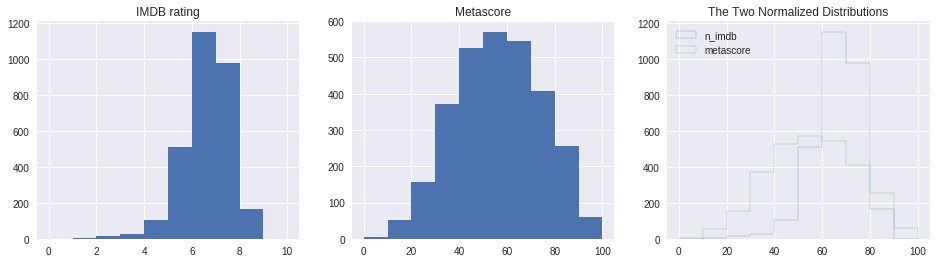

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()